In [12]:
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

file_path = 'Dataset-for-WSN-fault-detection\Intel_data.txt'
df = pd.read_csv(file_path, sep='\s+')  # Using space as separator, skipping first 2 rows


In [13]:
df= df.dropna(axis=0)
np.sort(df['Date'].unique())
for date in np.sort(df['Date'].unique()):
    num_data = (df['Date']==date).sum()
    print(f"Date: {date}, data: {num_data}")

Date: 2004-02-28, data: 83177
Date: 2004-02-29, data: 91649
Date: 2004-03-01, data: 91468
Date: 2004-03-02, data: 87518
Date: 2004-03-03, data: 86184
Date: 2004-03-04, data: 85957
Date: 2004-03-05, data: 88180
Date: 2004-03-06, data: 91958
Date: 2004-03-07, data: 95981
Date: 2004-03-08, data: 99187
Date: 2004-03-09, data: 93039
Date: 2004-03-10, data: 37364
Date: 2004-03-11, data: 52150
Date: 2004-03-12, data: 84964
Date: 2004-03-13, data: 85488
Date: 2004-03-14, data: 84069
Date: 2004-03-15, data: 51739
Date: 2004-03-16, data: 37711
Date: 2004-03-17, data: 83551
Date: 2004-03-18, data: 59750
Date: 2004-03-19, data: 76459
Date: 2004-03-20, data: 76873
Date: 2004-03-21, data: 68010
Date: 2004-03-22, data: 35580
Date: 2004-03-23, data: 77346
Date: 2004-03-24, data: 47246
Date: 2004-03-25, data: 33578
Date: 2004-03-26, data: 29576
Date: 2004-03-27, data: 32923
Date: 2004-03-28, data: 47520
Date: 2004-03-29, data: 31523
Date: 2004-03-30, data: 28938
Date: 2004-03-31, data: 29970
Date: 2004

In [14]:
df_sorted = df.sort_values(by=['Date', 'Time', 'Epoch','Moteid'])
df_sorted=df_sorted[(df_sorted['Date'] >= '2004-03-01') & (df_sorted['Date'] <= '2004-03-23')]
df_sorted.reset_index(drop=True, inplace=True)
df_sorted

,Date,Time,Epoch,Moteid,Temperature,Humidity,Light,Voltage
0,2004-03-01,00:00:00.14964,5644,50.0,16.2644,48.83800,0.02011,2.63964
1,2004-03-01,00:00:20.291409,5645,11.0,17.9990,45.90110,2.30000,2.52732
2,2004-03-01,00:00:20.42376,5645,46.0,17.2934,46.06550,1.84000,2.47467
3,2004-03-01,00:00:21.007618,5645,29.0,17.8618,45.40720,165.60000,2.63964
4,2004-03-01,00:00:21.280684,5645,18.0,18.7732,42.38400,4.14000,2.47467
...,...,...,...,...,...,...,...,...
1730521,2004-03-23,23:59:56.069588,35407,49.0,122.1530,-3.91901,114.08000,2.25825
1730522,2004-03-23,23:59:57.358711,35407,7.0,122.1530,43.35250,114.08000,2.32000
1730523,2004-03-23,23:59:58.729384,35407,9.0,19.9884,47.50570,114.08000,2.39484
1730524,2004-03-23,23:59:58.883148,35407,6.0,1.7310,-3.91901,136.16000,2.19159


36007


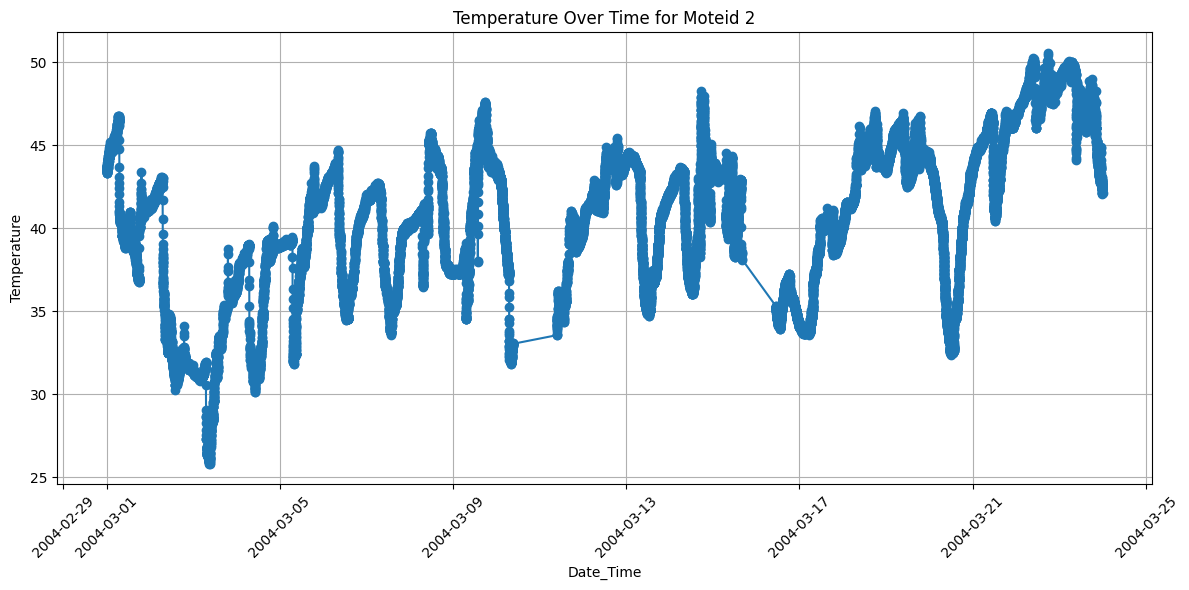

In [15]:
specific_moteid = 2  # Change this to the Moteid you're interested in

df_moteid = df_sorted[df_sorted['Moteid'] == specific_moteid]

# date_list = ['2004-03-04', '2004-03-05']
# df_moteid = df_moteid[df_moteid['Date'].isin(date_list)]
df_moteid = df_moteid[(df_moteid['Date'] >= '2004-03-01') & (df_moteid['Date'] <= '2004-03-23')]

# Ensure 'Date_Time' is in datetime format (if it is a combination of Date and Time)
df_moteid['Date_Time'] = pd.to_datetime(df_moteid['Date'] + ' ' + df_moteid['Time'])

# df_moteid = df_moteid[(df_moteid['Epoch'] >= 17000) & (df_moteid['Epoch'] <= 18000)]

print(df_moteid.shape[0])
# Plotting Temperature over Time   
plt.figure(figsize=(12, 6))
plt.plot(df_moteid['Date_Time'], df_moteid['Humidity'], marker='o')
plt.title(f'Temperature Over Time for Moteid {specific_moteid}')
plt.xlabel('Date_Time')
plt.ylabel('Temperature')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

C:\Users\LamNH\AppData\Local\Temp\ipykernel_4292\3707896232.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_moteid['Date_Time'] = pd.to_datetime(df_moteid['Date'] + ' ' + df_moteid['Time'])


KeyError: 'Date_time'

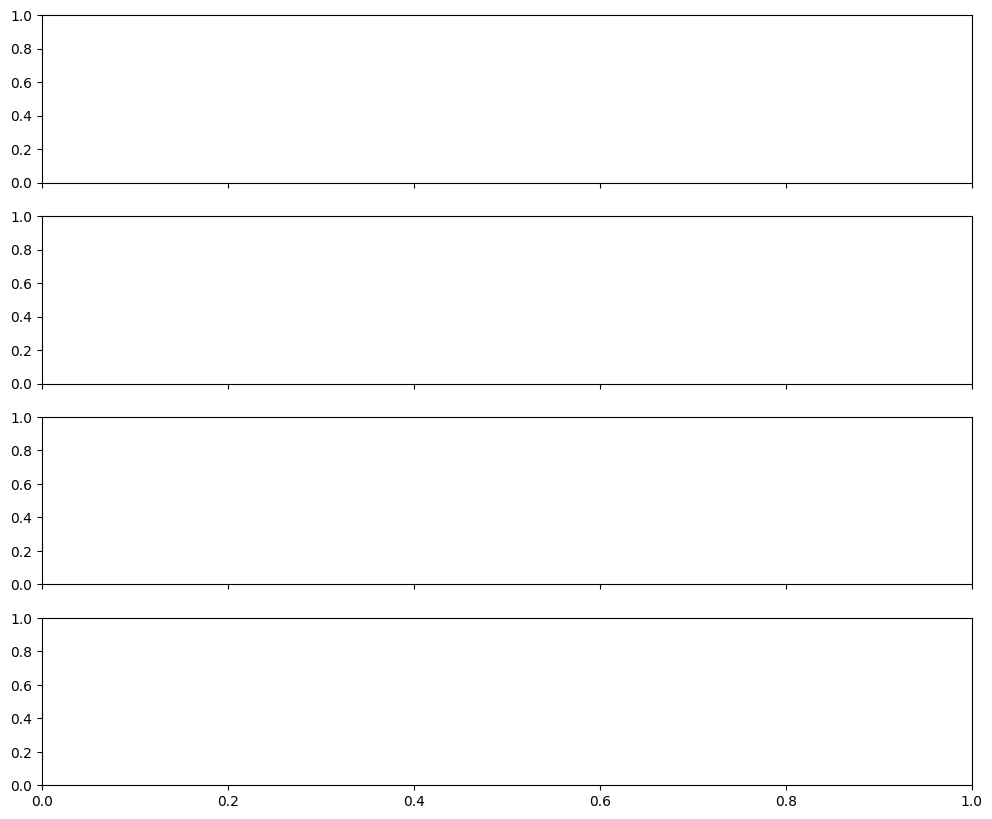

In [16]:

# Assuming df_sorted is already defined and contains the necessary data
specific_moteid = 2  # Change this to the Moteid you're interested in

# Filter for the specific Moteid and dates
df_moteid = df_sorted[df_sorted['Moteid'] == specific_moteid]
# date_list = ['2004-03-04', '2004-03-05']
# df_moteid = df_moteid[df_moteid['Date'].isin(date_list)]

# Ensure 'Date_Time' is in datetime format
df_moteid['Date_Time'] = pd.to_datetime(df_moteid['Date'] + ' ' + df_moteid['Time'])

# Filter for Epoch range
# df_moteid = df_moteid[(df_moteid['Epoch'] >= 21500) & (df_moteid['Epoch'] <= 23500)]
df_moteid = df_moteid[(df_moteid['Date'] >= '2004-03-06') & (df_moteid['Date'] <= '2004-03-07')]

# Creating subplots for each property
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Plot Temperature
axs[0].plot(df_moteid['Date_time'], df_moteid['Temperature'], marker='o', color='r')
axs[0].set_title('Temperature Over Time')
axs[0].set_ylabel('Temperature')

# Plot Humidity
axs[1].plot(df_moteid['Date_time'], df_moteid['Humidity'], marker='o', color='b')
axs[1].set_title('Humidity Over Time')
axs[1].set_ylabel('Humidity')

# Plot Light
axs[2].plot(df_moteid['Date_time'], df_moteid['Light'], marker='o', color='g')
axs[2].set_title('Light Over Time')
axs[2].set_ylabel('Light')

# Plot Voltage
axs[3].plot(df_moteid['Date_time'], df_moteid['Voltage'], marker='o', color='m')
axs[3].set_title('Voltage Over Time')
axs[3].set_ylabel('Voltage')
axs[3].set_xlabel('Date_Time')

# Formatting
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.grid(True)
plt.show()

print(df_moteid.shape[0])

C:\Users\LamNH\AppData\Local\Temp\ipykernel_2220\1241809620.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_moteid['Date_Time'] = pd.to_datetime(df_moteid['Date'] + ' ' + df_moteid['Time'])
C:\Users\LamNH\AppData\Local\Temp\ipykernel_2220\1241809620.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_moteid['Date_Time'] = pd.to_datetime(df_moteid['Date'] + ' ' + df_moteid['Time'])
C:\Users\LamNH\AppData\Local\Temp\ipykernel_2220\1241809620.py:16: SettingWithCopyWarning: 
A value is trying to be 

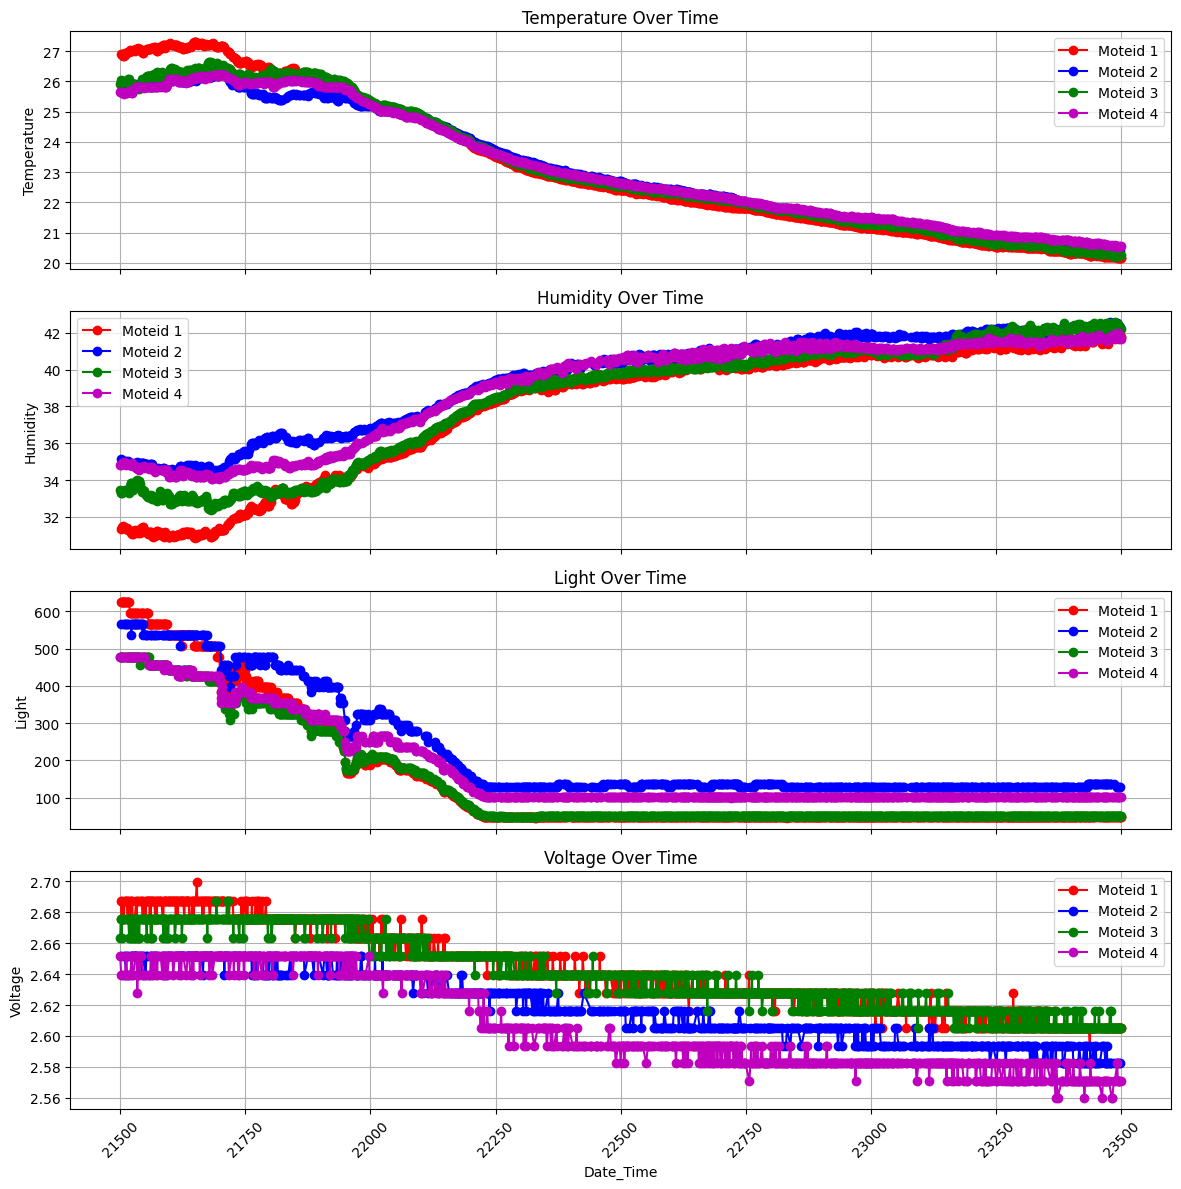

In [73]:
moteids = [1, 2, 3, 4]  # Moteids to plot
date_list = ['2004-03-04', '2004-03-05']

# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

# Define colors for each Moteid
colors = ['r', 'b', 'g', 'm']

for i, moteid in enumerate(moteids):
    # Filter for the specific Moteid and dates
    df_moteid = df_sorted[df_sorted['Moteid'] == moteid]
    # df_moteid = df_moteid[df_moteid['Date'].isin(date_list)]
    
    # Ensure 'Date_Time' is in datetime format
    df_moteid['Date_Time'] = pd.to_datetime(df_moteid['Date'] + ' ' + df_moteid['Time'])
    
    # Filter for Epoch range
    df_moteid = df_moteid[(df_moteid['Epoch'] >= 21500) & (df_moteid['Epoch'] <= 23500)]
    
    # Plot Temperature
    axs[0].plot(df_moteid['Epoch'], df_moteid['Temperature'], marker='o', color=colors[i], label=f'Moteid {moteid}')
    
    # Plot Humidity
    axs[1].plot(df_moteid['Epoch'], df_moteid['Humidity'], marker='o', color=colors[i], label=f'Moteid {moteid}')
    
    # Plot Light
    axs[2].plot(df_moteid['Epoch'], df_moteid['Light'], marker='o', color=colors[i], label=f'Moteid {moteid}')
    
    # Plot Voltage
    axs[3].plot(df_moteid['Epoch'], df_moteid['Voltage'], marker='o', color=colors[i], label=f'Moteid {moteid}')

# Set titles and labels for each subplot
axs[0].set_title('Temperature Over Time')
axs[0].set_ylabel('Temperature')
axs[1].set_title('Humidity Over Time')
axs[1].set_ylabel('Humidity')
axs[2].set_title('Light Over Time')
axs[2].set_ylabel('Light')
axs[3].set_title('Voltage Over Time')
axs[3].set_ylabel('Voltage')
axs[3].set_xlabel('Date_Time')

# Add legends to each subplot
for ax in axs:
    ax.legend()
    ax.grid(True)

# Formatting
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

C:\Users\LamNH\AppData\Local\Temp\ipykernel_4292\3358404109.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_moteid_specific['Date_Time'] = pd.to_datetime(df_moteid_specific['Date'] + ' ' + df_moteid_specific['Time'])


19.475629411764704
26.105381818181822


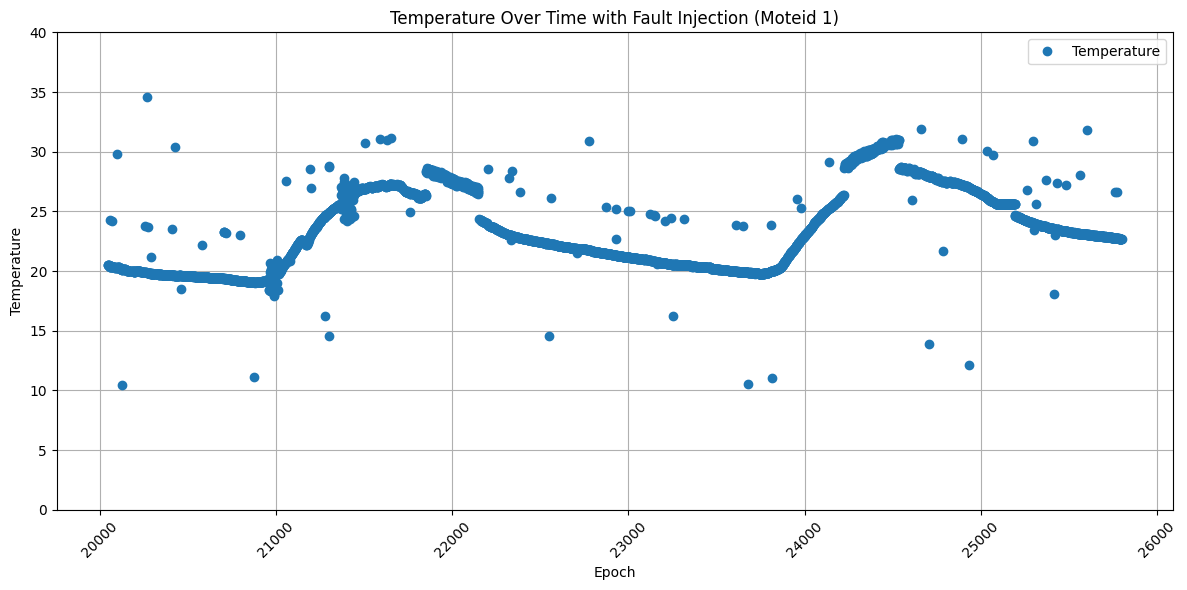

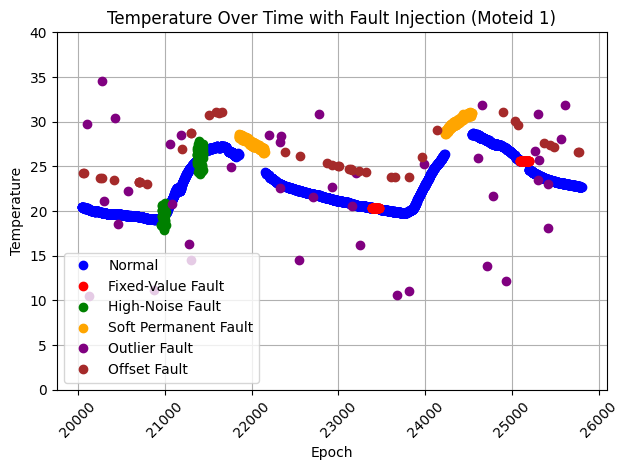

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_sorted is already defined and contains the necessary data
specific_moteid = df_sorted['Moteid'].unique # Change this to the Moteid you're interested in
specific_moteid = 1 # Change this to the Moteid you're interested in

# Filter for the specific Moteid
df_moteid_specific = df_sorted[df_sorted['Moteid'] == specific_moteid]

# Ensure 'Date_Time' is in datetime format
df_moteid_specific['Date_Time'] = pd.to_datetime(df_moteid_specific['Date'] + ' ' + df_moteid_specific['Time'])
df_moteid_specific = df_moteid_specific[(df_moteid_specific['Date'] >= '2004-03-06') & (df_moteid_specific['Date'] <= '2004-03-07')]
# df_moteid_specific = df_moteid_specific[(df_moteid_specific['Epoch'] >= 20000) & (df_moteid_specific['Epoch'] <= 25000)]

# Create a copy for fault injection
df_faulty = df_moteid_specific.copy()
df_faulty.reset_index(drop=True, inplace=True)
df_faulty_0 = df_faulty
# Add 'Fault_Label' column to mark faults (0 = normal, 1 = faulty)
df_faulty['Fault_Label'] = 0
df_faulty['Fault_type']=0

# Total number of data points to inject faults into
num_total_faults = len(df_faulty)

# Fault rates for SPF, IF, and TF
num_interval_spf = 2
fixed_fault_attemps = 2
noise_interval = 2

spf_rate = 0.05  # 5% for SPF
fixed_rate = 0.05  # 40% fixed-value faults
outlier_rate = 0.01  # 30% outlier faults
noise_rate = 0.03 # 20% high-noise faults
offset_rate = 0.01  # 10% offset faults

used_indices = set()

# Calculate the number of faults for each type
num_spf =int(spf_rate * num_total_faults)
num_fixed_faults = int(fixed_rate * num_total_faults)
num_outlier_faults = int(outlier_rate * num_total_faults)
num_noise_faults = int(noise_rate * num_total_faults)
num_offset_faults = int(offset_rate * num_total_faults)

# 1. Inject Fixed-Value Faults (0.5%)
for i in range(fixed_fault_attemps):
    fixed_value_start = np.random.choice(df_faulty.index.difference(used_indices),size=1)[0]  # Arbitrary fixed temperature value
    fixed_fault_length = np.random.randint(30,num_fixed_faults)
    fixed_value_end = fixed_value_start + fixed_fault_length
    fixed_value_end = min(fixed_value_end, df_faulty.index[-1])

    fixed_value = df_faulty_0.iloc[fixed_value_start]['Temperature']
    df_faulty.loc[fixed_value_start:fixed_value_end,'Temperature'] = fixed_value
    df_faulty.loc[fixed_value_start:fixed_value_end, 'Fault_Label'] = 1
    df_faulty.loc[fixed_value_start:fixed_value_end, 'Fault_type'] = 1

    used_indices.update(range(fixed_value_start-20, fixed_value_end + 1+20))



# 3. Inject High-Noise Faults (0.5%)
noise_fault_indices = np.random.choice(df_faulty.index, size=num_noise_faults, replace=False)
# Add random noise to the temperature (normal temperature ± 10 degrees of noise)
for i in range(noise_interval):
    gau_noise_start = np.random.choice(df_faulty.index.difference(used_indices))  # Arbitrary fixed temperature value
    gau_noise_len = np.random.randint(30,num_noise_faults+1)
    gau_noise_end = gau_noise_start + gau_noise_len
    gau_noise_end = min(gau_noise_end, df_faulty.index[-1])
    
    temperature_range = df_faulty_0.loc[gau_noise_start:gau_noise_end, 'Temperature']

    # Generate noise with a mean based on the actual values in the range and standard deviation of 1
    print(np.mean(temperature_range))
    noise = np.random.normal(np.mean(temperature_range), 1, size=len(temperature_range))

    df_faulty.loc[gau_noise_start:gau_noise_end,'Temperature'] = noise
    df_faulty.loc[gau_noise_start:gau_noise_end, 'Fault_Label'] = 1
    df_faulty.loc[gau_noise_start:gau_noise_end, 'Fault_type'] = 2

    used_indices.update(range(gau_noise_start-20, gau_noise_end + 1+20))
    



# 1. Inject Soft Permanent Fault (SPF)
# Apply a constant offset from a random starting point until the end of the data
for i in range(num_interval_spf):
    spf_start_idx = np.random.choice(df_faulty.index.difference(used_indices), size=1)[0]
    spf_end_idx = spf_start_idx + num_spf

    # Ensure the end index does not exceed the data length
    spf_end_idx = min(spf_end_idx, len(df_faulty) - 1)
    # Apply a constant offset to the temperature for the entire interval
    df_faulty.loc[spf_start_idx:spf_end_idx,'Temperature'] = df_faulty_0[spf_start_idx:spf_end_idx]['Temperature']+np.random.uniform(2.5,2,size = spf_end_idx-spf_start_idx)  # Adding a constant offset of 5 degrees
    df_faulty.loc[spf_start_idx:spf_end_idx, 'Fault_Label'] = 1
    df_faulty.loc[spf_start_idx:spf_end_idx, 'Fault_type'] = 3
    used_indices.update(range(spf_start_idx-20, spf_end_idx + 1+20))

# 2. Inject Outlier Faults (0.5%)
outlier_fault_indices = np.random.choice(df_faulty.index.difference(used_indices), size=num_outlier_faults, replace=False
) 
# Inject extreme random outliers (e.g., values between -50 and 150)
df_faulty.loc[outlier_fault_indices, 'Temperature'] = np.random.uniform(10, 35, size=num_outlier_faults)
df_faulty.loc[outlier_fault_indices, 'Fault_Label'] = 1
df_faulty.loc[outlier_fault_indices, 'Fault_type'] = 4

used_indices.update(outlier_fault_indices)

# 4. Inject Offset Faults (10%)
offset_fault_indices = np.random.choice(
    df_faulty.index.difference(used_indices),
    size=num_offset_faults, replace=False
)
# Apply a constant offset (e.g., adding 5 degrees)
df_faulty.loc[offset_fault_indices, 'Temperature'] += np.random.uniform(0,10)
df_faulty.loc[offset_fault_indices, 'Fault_Label'] = 1
df_faulty.loc[offset_fault_indices, 'Fault_type'] = 5

used_indices.update(offset_fault_indices)

# Plotting the Temperature data with faults
plt.figure(figsize=(12, 6))
plt.plot(df_faulty['Epoch'], df_faulty['Temperature'], marker='o', label='Temperature',linestyle='None')
plt.title(f'Temperature Over Time with Fault Injection (Moteid {specific_moteid})')
plt.xlabel('Epoch')
plt.ylabel('Temperature')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylim(0, 40)  # Set y-axis limits between 0 and 100
plt.grid()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.legend()
plt.show()

# Plot the normal (non-faulty) data in blue
normal_data = df_faulty[df_faulty['Fault_Label'] == 0]
plt.plot(normal_data['Epoch'], normal_data['Temperature'], marker='o', linestyle='None', color='blue', label='Normal')

# Plot fixed-value faults (type 1) in red
fixed_value_faults = df_faulty[df_faulty['Fault_type'] == 1]
plt.plot(fixed_value_faults['Epoch'], fixed_value_faults['Temperature'], marker='o', linestyle='None', color='red', label='Fixed-Value Fault')

# Plot high-noise faults (type 2) in green
high_noise_faults = df_faulty[df_faulty['Fault_type'] == 2]
plt.plot(high_noise_faults['Epoch'], high_noise_faults['Temperature'], marker='o', linestyle='None', color='green', label='High-Noise Fault')

# Plot soft permanent faults (SPF) (type 3) in orange
spf_faults = df_faulty[df_faulty['Fault_type'] == 3]
plt.plot(spf_faults['Epoch'], spf_faults['Temperature'], marker='o', linestyle='None', color='orange', label='Soft Permanent Fault')

# Plot outlier faults (type 4) in purple
outlier_faults = df_faulty[df_faulty['Fault_type'] == 4]
plt.plot(outlier_faults['Epoch'], outlier_faults['Temperature'], marker='o', linestyle='None', color='purple', label='Outlier Fault')

# Plot offset faults (type 5) in brown
offset_faults = df_faulty[df_faulty['Fault_type'] == 5]
plt.plot(offset_faults['Epoch'], offset_faults['Temperature'], marker='o', linestyle='None', color='brown', label='Offset Fault')

# Set up plot labels and title
plt.title(f'Temperature Over Time with Fault Injection (Moteid {specific_moteid})')
plt.xlabel('Epoch')
plt.ylabel('Temperature')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylim(0, 40)  # Set y-axis limits between 0 and 100
plt.grid()

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [267]:
specific_moteid = np.sort(df_sorted['Moteid'].unique())
specific_moteid

array([ 1.,  2.,  3.,  4.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
       29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41.,
       42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54.,
       55.])